# Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# Data Normalization

In [3]:
df = pd.read_csv('final.csv')
print(df.shape)
df.head()

(10449, 20)


,id,artist,name,popularity,preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,label
0,2b8fOow8UzyDFAE27YhOZM,Maroon 5,Memories,99,NaN,0.764,0.320,11.0,-7.209,1.0,0.0546,0.8370,0.00000,0.0822,0.575,91.019,audio_features,189486.0,4.0,toplists
1,6WrI0LAC5M1Rw2MnX2ZvEg,Dua Lipa,Don't Start Now,95,https://p.scdn.co/mp3-preview/ed151225213380a4...,0.794,0.793,11.0,-4.521,0.0,0.0842,0.0125,0.00000,0.0952,0.677,123.941,audio_features,183290.0,4.0,toplists
2,3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,94,NaN,0.704,0.225,6.0,-14.454,0.0,0.0994,0.9020,0.65700,0.1060,0.243,120.006,audio_features,245426.0,4.0,toplists
3,696DnlkuDOXcMAnKlTgXXK,Arizona Zervas,ROXANNE,88,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,0.621,0.601,6.0,-5.616,0.0,0.1480,0.0522,0.00000,0.4600,0.457,116.735,audio_features,163636.0,5.0,toplists
4,4VginDwYTP2eaHJzO0QMjG,Post Malone,Circles,68,NaN,0.704,0.758,0.0,-3.537,1.0,0.0402,0.2330,0.00144,0.0924,0.534,120.003,audio_features,214907.0,4.0,toplists


In [4]:
cols = ['artist','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature','label']
non_categorical = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
categorical = ['artist','key','mode','time_signature','label']

mms = MinMaxScaler()

df[non_categorical] = mms.fit_transform(df[non_categorical])
df.head()

,id,artist,name,popularity,preview,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,label
0,2b8fOow8UzyDFAE27YhOZM,Maroon 5,Memories,99,NaN,0.782787,0.320,11.0,0.867161,1.0,0.060331,0.840361,0.00000,0.082863,0.585540,0.377600,audio_features,0.133347,4.0,toplists
1,6WrI0LAC5M1Rw2MnX2ZvEg,Dua Lipa,Don't Start Now,95,https://p.scdn.co/mp3-preview/ed151225213380a4...,0.813525,0.793,11.0,0.911314,0.0,0.093039,0.012550,0.00000,0.095968,0.689409,0.514180,audio_features,0.128744,4.0,toplists
2,3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,94,NaN,0.721311,0.225,6.0,0.748152,0.0,0.109834,0.905622,0.65700,0.106855,0.247454,0.497855,audio_features,0.174910,4.0,toplists
3,696DnlkuDOXcMAnKlTgXXK,Arizona Zervas,ROXANNE,88,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,0.636270,0.601,6.0,0.893328,0.0,0.163536,0.052410,0.00000,0.463710,0.465377,0.484285,audio_features,0.114141,5.0,toplists
4,4VginDwYTP2eaHJzO0QMjG,Post Malone,Circles,68,NaN,0.721311,0.758,0.0,0.927478,1.0,0.044420,0.233936,0.00144,0.093145,0.543788,0.497843,audio_features,0.152235,4.0,toplists


# Data Visualization

In [0]:
def cluster_plot(new_data):    
    kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(new_data)
    t = [30,40,50,60,70,80,90]
    label_color = [t[i] for i in pred_y]
    plt.figure(figsize = (7,7))
    plt.scatter(new_data.iloc[:,0],new_data.iloc[:,1], c=label_color, alpha=0.5,cmap='viridis') 
    plt.show()

def silhoultte(new_data):
    kmeans = KMeans(random_state=0)
    visualizer = KElbowVisualizer(kmeans, k=(2,11), metric='silhouette', timings=False)
    visualizer.fit(new_data)    
    visualizer.poof()

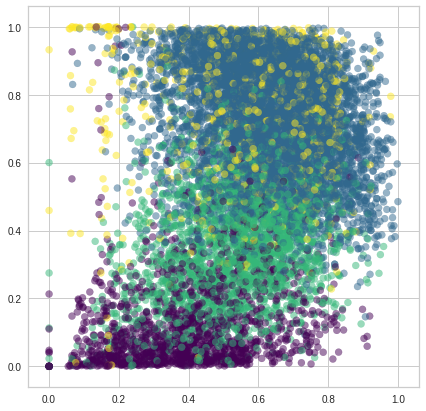

In [6]:
cluster_plot(df[non_categorical])

# PCA ( Principal Component Analysis)

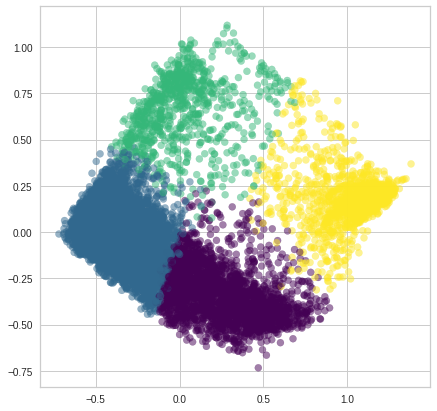

,0,1,2,3,4,5,6
0,0.256127,-0.521810,0.138744,-0.090820,0.127173,-0.112514,0.063021
1,-0.542197,0.000944,0.128033,-0.145677,0.016477,-0.030308,-0.002892
2,0.773966,0.020488,0.155532,-0.135814,0.148499,-0.179592,-0.091042
3,-0.339391,0.045402,-0.145966,0.077931,0.211139,0.173919,-0.092936
4,-0.325794,-0.065218,0.008516,-0.083025,-0.002374,-0.125450,0.046105


In [7]:
pca = PCA(0.95)
data = df.drop_duplicates()
data = pca.fit_transform(data[non_categorical])
cluster_plot(pd.DataFrame(data))
pd.DataFrame(data).head()

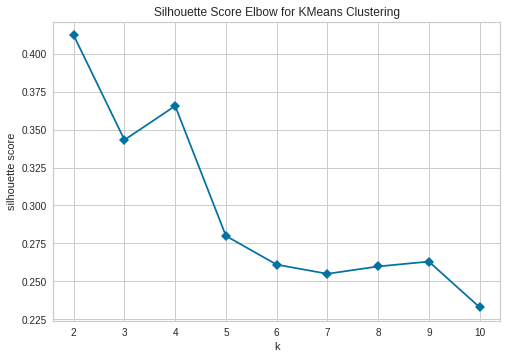

In [8]:
data = pd.DataFrame(data)
silhoultte(data)

#### From the above graph we can determine that the clustering algorithm requires four clusters

# Model Training

In [0]:
def train(df_train):
    n = 1
    for _ in range(n):
        # train_df, test_df = train_test_split(df_train)
        km = KMeans(
            n_clusters=4, init='random',
            n_init=10, max_iter=1000, 
            tol=1e-04, random_state=0
        )
        y_km = km.fit(df_train)
        # km.labels_
        # km.predict(test_df)
    return km

def k_mean_distance(center_coordinates, data_coordiantes):
    summ=0
    mag=0
    for i in range(len(center_coordinates)):
        summ+=(center_coordinates[i]-data_coordiantes[i])**2
        mag+=(data_coordiantes[i])**2
    return (summ)*0.5

In [10]:
km = train(data)
data['label'] = km.labels_
data['artist'] = df.artist
data['name'] = df.name
data['preview'] = df.preview
data['popularity'] = df.popularity
data['type'] = df.label
data.head()

,0,1,2,3,4,5,6,label,artist,name,preview,popularity,type
0,0.256127,-0.521810,0.138744,-0.090820,0.127173,-0.112514,0.063021,2,Maroon 5,Memories,NaN,99,toplists
1,-0.542197,0.000944,0.128033,-0.145677,0.016477,-0.030308,-0.002892,3,Dua Lipa,Don't Start Now,https://p.scdn.co/mp3-preview/ed151225213380a4...,95,toplists
2,0.773966,0.020488,0.155532,-0.135814,0.148499,-0.179592,-0.091042,1,Billie Eilish,everything i wanted,NaN,94,toplists
3,-0.339391,0.045402,-0.145966,0.077931,0.211139,0.173919,-0.092936,3,Arizona Zervas,ROXANNE,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,88,toplists
4,-0.325794,-0.065218,0.008516,-0.083025,-0.002374,-0.125450,0.046105,3,Post Malone,Circles,NaN,68,toplists


# Generating Outcome

In [0]:
def song_reccomendation(song,data):
    arr = []
    dummy_df = data.loc[data['label']==song.label.values[0]]
    print(len(dummy_df.values))
    for i in range(len(dummy_df.values)):
        if(i>51): break
        dist = k_mean_distance(dummy_df.values[i][0:7],song.values[0][0:7])
        arr.append((
            dummy_df.values[i][11]/(dist+0.00000001)**2,
            dist,
            dummy_df.values[i][11],
            dummy_df.values[i][8],
            dummy_df.values[i][9],
            dummy_df.values[i][10],
            dummy_df.values[i][12]
        ))
    arr.sort()
    return arr

def song_print(song):
    print('='*200)
    print('Artist:  ', song.artist.values[0])
    print('Song Name:   ', song.name.values[0])
    print('Type:   ', song['type'].values[0])
    print('Preview link:   ', song.preview.values[0])
    print('='*200)

In [28]:
song = data.loc[[2980]]
ans = song_reccomendation(song,data)
song_print(song)
j=1
for i in ans[::-1]:
    print('Number:  ', j)
    print('Popularity/distance:  ',i[0])
    print('Artist:  ', i[3])
    print('Song Name:   ', i[4])
    print('Type:   ', i[6])
    print('Preview link:   ', i[5])
    print('-'*100)
    j+=1

2448
Artist:   Cigarettes After Sex
Song Name:    Falling In Love
Type:    decades
Preview link:    https://p.scdn.co/mp3-preview/b99534447943c33a206c56cffb0b63f818aa7e1e?cid=99f699c35c2d4667917d680d9134d27e
Number:   1
Popularity/distance:   137854.79055139184
Artist:   Lewis Capaldi
Song Name:    Someone You Loved
Type:    toplists
Preview link:    nan
----------------------------------------------------------------------------------------------------
Number:   2
Popularity/distance:   100415.84526848188
Artist:   Jhené Aiko
Song Name:    Triggered - Remix
Type:    toplists
Preview link:    nan
----------------------------------------------------------------------------------------------------
Number:   3
Popularity/distance:   32794.37444903735
Artist:   Bruno Major
Song Name:    Tapestry
Type:    toplists
Preview link:    https://p.scdn.co/mp3-preview/d56ef54b6fbcdfbfd361805c586520df4442dda2?cid=99f699c35c2d4667917d680d9134d27e
------------------------------------------------------